In [3]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.segmentation import watershed
from skimage.feature import canny
from skimage.filters import sobel
from skimage.measure import label
import scipy.ndimage as nd

In [38]:
def adaptive_histogram(image):
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(image)
def watershed(img):
    img = cv.imread('testImage.png')
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
    # sure background area
    sure_bg = cv.dilate(opening,kernel,iterations=3)
    # Finding sure foreground area
    dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
    ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv.subtract(sure_bg,sure_fg)
    # Marker labelling
    ret, markers = cv.connectedComponents(sure_fg)
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1
    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0
    markers = cv.watershed(img,markers)
    img[unknown == 255] = 0
    img[markers == -1] = [255,0,0]
    return img

In [39]:
image = cv.imread('testImage.png', cv.IMREAD_GRAYSCALE)
adaptive_image = adaptive_histogram(image)
watershed_image = watershed(image)

print(image.shape)
print(adaptive_image.shape)
print(watershed_image.shape)

(411, 512)
(411, 512)
(411, 512, 3)


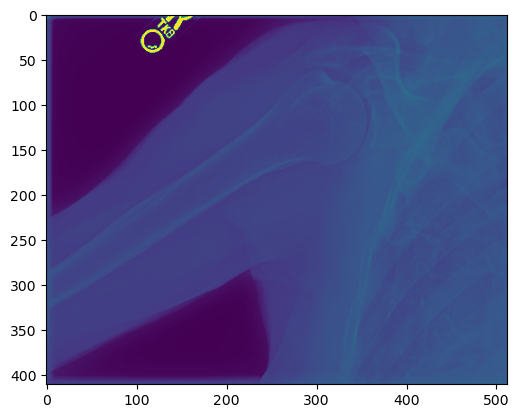

In [40]:
plt.imshow(image)

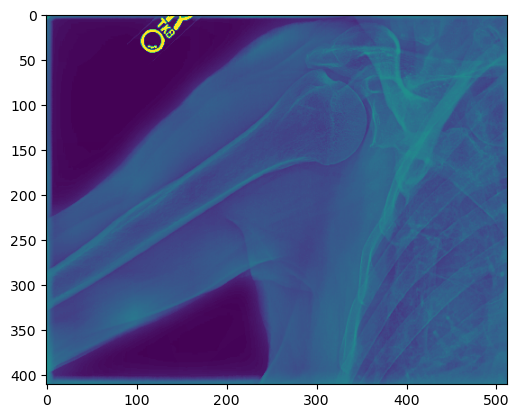

In [41]:
plt.imshow(adaptive_image)

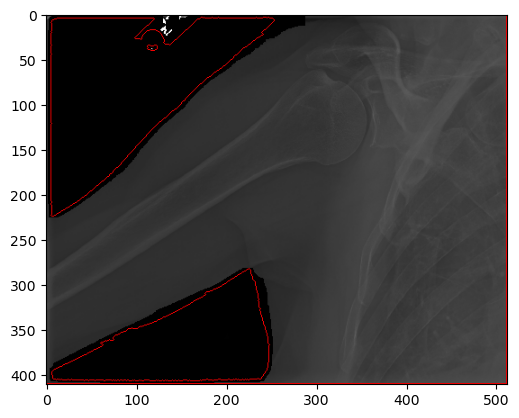

In [42]:
plt.imshow(watershed_image)